In [1]:
''' 
!pip install numpy
!pip install plotly
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install sklearn
!pip install statsmodels
!pip install yellowbrick
!pip install imblearn
!pip install xgboost
!pip install graphviz
!pip install scikit-learn
!pip install pycaret
!pip install streamlit
!pip install shap
!pip install tabulate
!pip install explainerdashboard
'''

' \n!pip install numpy\n!pip install plotly\n!pip install pandas\n!pip install matplotlib\n!pip install seaborn\n!pip install sklearn\n!pip install statsmodels\n!pip install yellowbrick\n!pip install imblearn\n!pip install xgboost\n!pip install graphviz\n!pip install scikit-learn\n!pip install pycaret\n!pip install streamlit\n!pip install shap\n!pip install tabulate\n!pip install explainerdashboard\n'

In [2]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from math import * # module math
from pycaret.classification import *
from IPython.display import Markdown, display
import seaborn as sns
import plotly.io as pio
pio.renderers.default = 'jupyterlab'
import plotly.graph_objs as go # visualization
import matplotlib.pyplot as plt # visualization
from PIL import Image
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from tabulate import tabulate

import itertools
import io
import plotly.offline as py # visualization
py.init_notebook_mode(connected=True) # visualization
from plotly.subplots import make_subplots
import plotly.figure_factory as ff # visualization
import warnings
warnings.filterwarnings("ignore")

# set Matplotlib to plot inline so that the outputted plot will appear immediately under each code cell.
%matplotlib inline
def printtitle(string):
    display(Markdown(string))
    

In [3]:
# Plot Correlation Matrix of all independent variables

def plotcorrmatrix(dfSet):
    td = dfSet.copy()
    ## Set and compute the Correlation Matrix
    sns.set(style="white")
    corr = td.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure and a diverging colormap
    f, ax = plt.subplots(figsize=(18, 15))
    cmap = sns.diverging_palette(240, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    
    
    

In [4]:
def plotpair(dfSet, target):
    #Separating columns to be visualized
    td = dfSet.copy()
    out_cols = list(set(td.nunique()[td.nunique()<6].keys().tolist()
                        + td.select_dtypes(include='object').columns.tolist()))
    viz_cols = [x for x in td.columns if x not in out_cols] #+ [target]

    sns.set(font_scale=2)  # crazy big 
    # Set the palette to the "pastel" default palette:
    sns.set_palette(sns.color_palette("cubehelix", 10))
    #diverging_colors = sns.color_palette("RdBu", 10)
    #sns.palplot(diverging_colors)
    sns.pairplot(td[viz_cols], diag_kind="kde")
    plt.show()
    

In [5]:
def modelboxplot(title, names, model):
    fig = plt.figure(figsize=(15, 7))
    ax = fig.add_subplot(111)
    plt.boxplot(model)
    ax.set_xticklabels(names)

    plt.title(title,horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
    #plt.legend(loc='top right', fontsize = "medium")
    plt.xticks(rotation=0, horizontalalignment="center")
    plt.yticks(rotation=0, horizontalalignment="right")


    plt.show()
    
    

In [6]:
# Check Multicollinearity using VIF - VIF starts usually at 1 and anywhere exceeding 10 indicates high multicollinearity between the independent variables.

def calc_vif(X):
    print("Checking for high multicollinearity between feature")
    # Calculating VIF
    vifd = pd.DataFrame()
    vifd["variables"] = X.columns
    vifd["VIF"] = [variance_inflation_factor(X.values, i) 
                  for i in range(X.shape[1])]
    
    pd.options.display.float_format = "{:.2f}".format
    return(vifd)

In [7]:
printtitle("# Adewale Adetule")
printtitle("## Student Number: 501078784")

# Adewale Adetule

## Student Number: 501078784

In [8]:
# Read and Load Dataset
# Set the column header property to make our data more readable
printtitle("### Load Data Set")
headers = ['RowNumber', 'CustomerId', 'Surname', 'CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts',
    'HasCrCard','IsActiveMember','EstimatedSalary','Exited']

bank_customers = pd.read_csv('Churn_Modelling.csv', sep=',', header=0, names=headers)

bank_customers.head()

### Load Data Set

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
printtitle("### Get Information about Categorical Data - Unique feature")
print(bank_customers["Exited"].nunique(), end='\n')
print(*bank_customers["Exited"].unique(), sep=', ')
print(bank_customers["Geography"].nunique(), end='\n')
print(*bank_customers["Geography"].unique(), sep=', ')
print(bank_customers["HasCrCard"].nunique(), end='\n')
print(*bank_customers["HasCrCard"].unique(), sep=', ')
print(bank_customers["IsActiveMember"].nunique(), end='\n')
print(*bank_customers["IsActiveMember"].unique(), sep=', ')

### Get Information about Categorical Data - Unique feature

2
1, 0
3
France, Spain, Germany
2
1, 0
2
1, 0


In [10]:
# Convert our Target variable into boolean type data
bank_customers['Exited'] = bank_customers['Exited'].map({1:True ,0:False})

# Convert other categorical variables into boolean type data
bank_customers['Geography'] = bank_customers['Geography'].map({'France':'France' ,'Spain':'Spain' ,'Germany':'Germany'})
bank_customers['HasCrCard'] = bank_customers['HasCrCard'].map({0:'No' ,1:'Yes'})
bank_customers['IsActiveMember'] = bank_customers['IsActiveMember'].map({0:'No' ,1:'Yes'})

bank_customers_bac = bank_customers.copy()
bank_customers = bank_customers.drop(columns = ['RowNumber', 'CustomerId', 'Surname'])

printtitle('### Dataset after:')
printtitle('#### Removing redundant variables and mapping categorical variable')
bank_customers.head()

### Dataset after:

#### Removing redundant variables and mapping categorical variable

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,True
1,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,False
2,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,True
3,699,France,Female,39,1,0.00,2,No,No,93826.63,False
4,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,False


In [11]:
printtitle('### Dataset types')
bank_customers.dtypes

### Dataset types

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard           object
IsActiveMember      object
EstimatedSalary    float64
Exited                bool
dtype: object

In [12]:
printtitle('### Dataset statistical descriptions')
bank_customers.describe()

### Dataset statistical descriptions

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


In [13]:
printtitle('### Dataset information - Also shows non null record')
print("Sum of Record in Customer with missing values is " + str(bank_customers.isnull().sum().sum()))
bank_customers.info()

### Dataset information - Also shows non null record

Sum of Record in Customer with missing values is 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  object 
 8   IsActiveMember   10000 non-null  object 
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  bool   
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 791.1+ KB


In [14]:
printtitle('### Dataset - Explicit check for Null/NA')
bank_customers.isna().any()

### Dataset - Explicit check for Null/NA

CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [15]:
printtitle('### Dataset - Information for Categorical Feature ')
print('Exited Field - Count =', bank_customers["Exited"].nunique(), ', Possible Values:', end='\n')
print(*bank_customers["Exited"].unique(), sep=', ')
print('Geography Field - Count =', bank_customers["Geography"].nunique(), ', Possible Values:', end='\n')
print(*bank_customers["Geography"].unique(), sep=', ')
print('HasCrdCard Field - Count =', bank_customers["HasCrCard"].nunique(),  ', Possible Values:', end='\n')
print(*bank_customers["HasCrCard"].unique(), sep=', ')
print('IsActive Field - Count =', bank_customers["IsActiveMember"].nunique(),  ', Possible Values:', end='\n')
print(*bank_customers["IsActiveMember"].unique(), sep=', ')

### Dataset - Information for Categorical Feature 

Exited Field - Count = 2 , Possible Values:
True, False
Geography Field - Count = 3 , Possible Values:
France, Spain, Germany
HasCrdCard Field - Count = 2 , Possible Values:
Yes, No
IsActive Field - Count = 2 , Possible Values:
Yes, No


In [16]:
printtitle('### Check correlation between Feature Variable')
bank_customers.drop(columns = ['Exited'], axis=1).corr(method = "pearson")
# bankcustomers_feature.corr(method = "pearson")

### Check correlation between Feature Variable

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.001384
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.007201
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.007784
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,0.012797
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.014204
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,1.000000


### Customer Churn Feature Variable Correlation Plot

<AxesSubplot:>

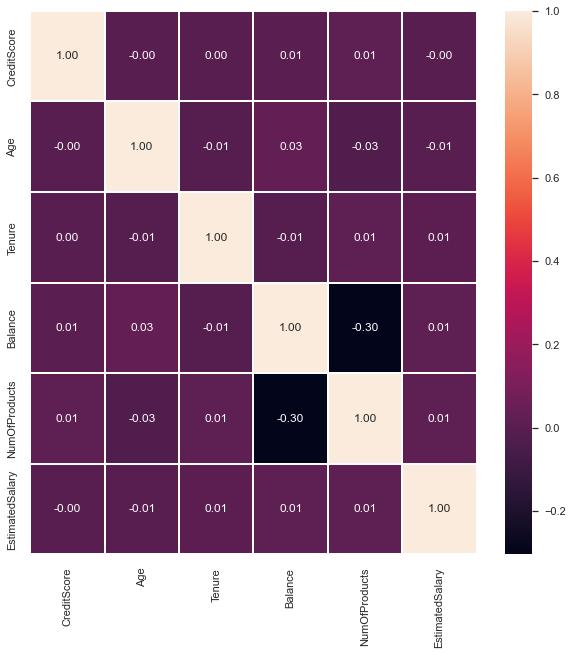

In [17]:
printtitle("### Customer Churn Feature Variable Correlation Plot")
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(bank_customers.drop(columns = ['Exited'], axis=1).corr(), annot=True, fmt=".2f", linewidth=2)

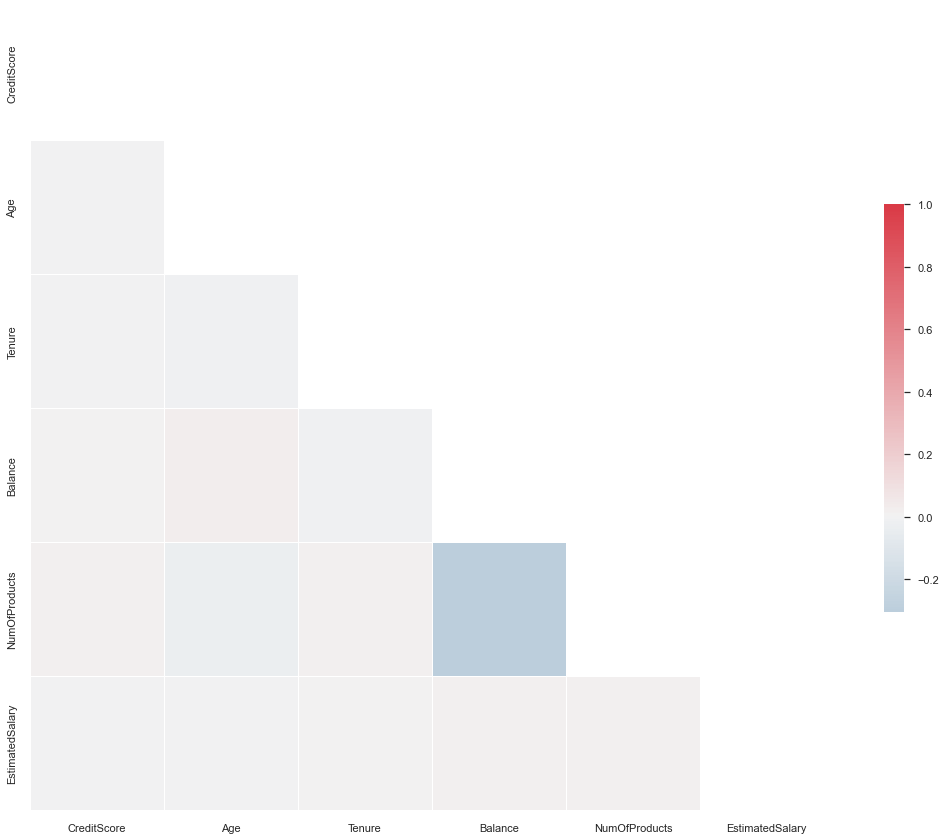

In [18]:
plotcorrmatrix(bank_customers.drop(columns = ['Exited'], axis=1))

### Frequency distribution of Churned Customer

Churn Bank Customers Distribution by Exited


<AxesSubplot:xlabel='Exited', ylabel='count'>

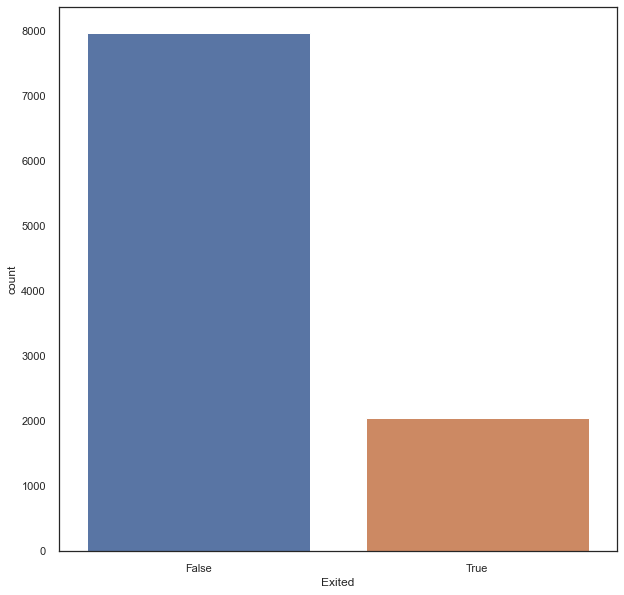

In [19]:
printtitle('### Frequency distribution of Churned Customer')
print('Churn Bank Customers Distribution by Exited')
sns.countplot(bank_customers["Exited"])

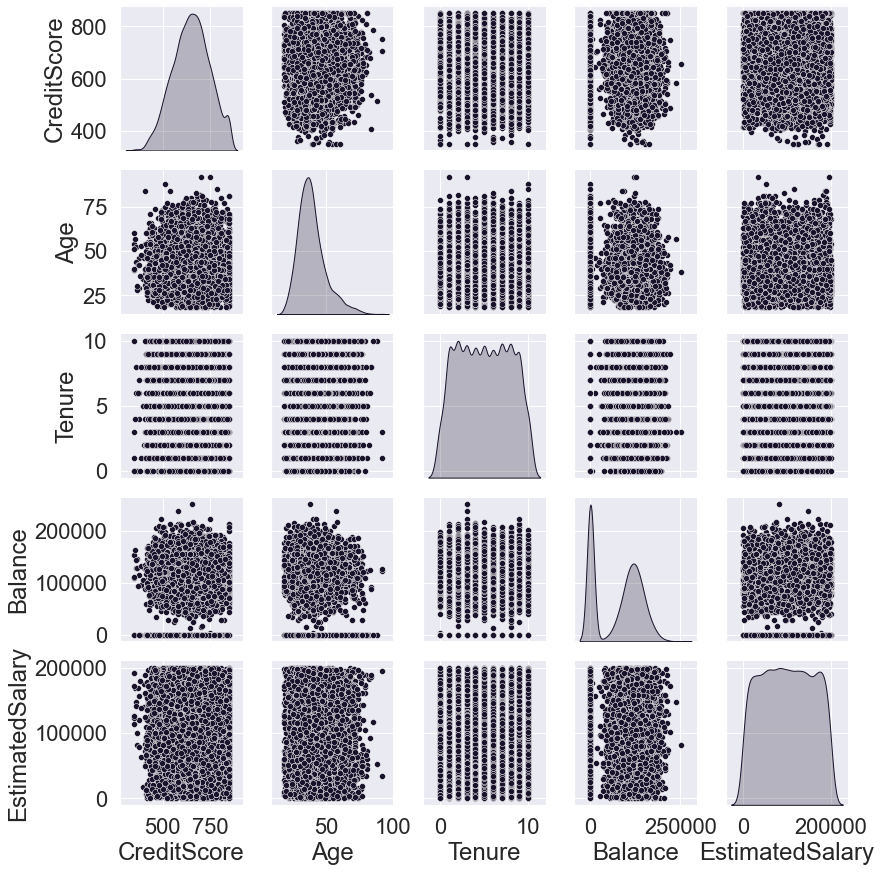

In [20]:
plotpair(bank_customers,"Exited")

In [21]:
appdf = bank_customers.copy()
appdf['Exited'] = appdf['Exited'].map({True:'Leaves' ,False:'Stays'})

trace = go.Pie(labels = appdf["Exited"].value_counts().keys().tolist(),
               values = appdf["Exited"].value_counts().values.tolist(),
               marker = dict(colors = ['#1f76b4','#ec838a'],
                             line = dict(color = 'white', width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Customer churn data",
                        plot_bgcolor = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show(renderer="iframe")
#py.iplot(fig)

<AxesSubplot:title={'center':'Churn Per Active Customer'}, xlabel='IsActiveMember'>

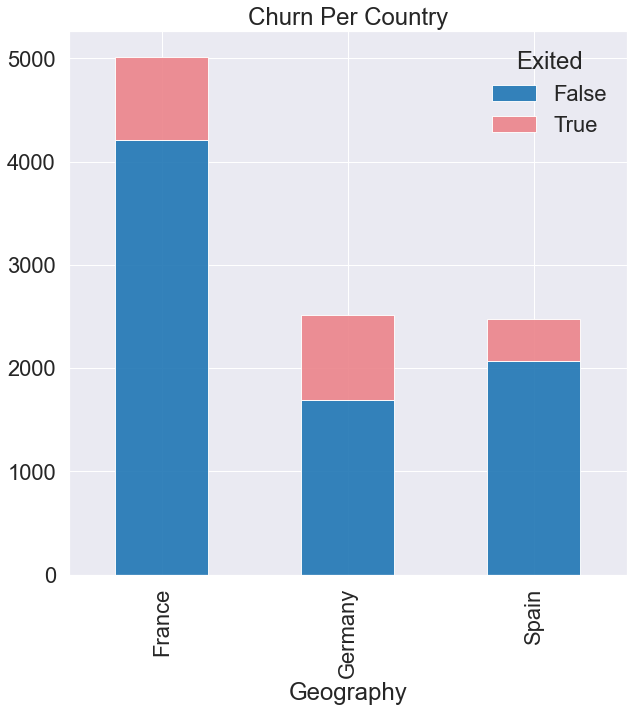

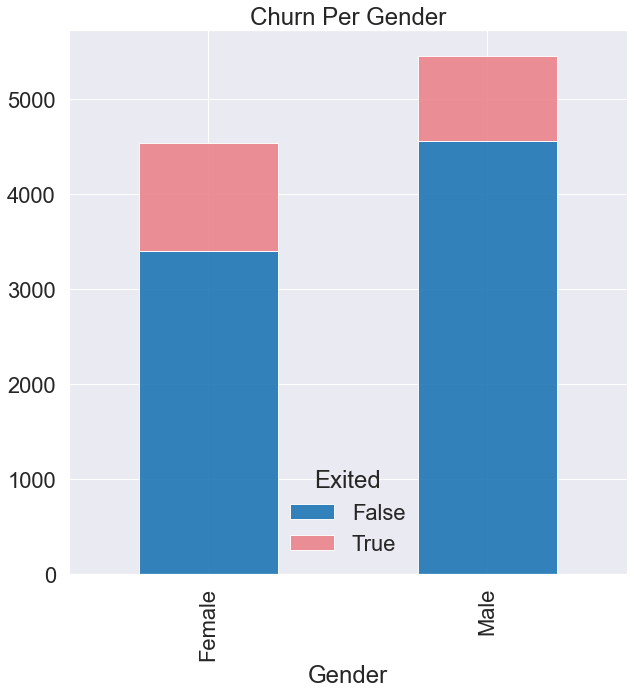

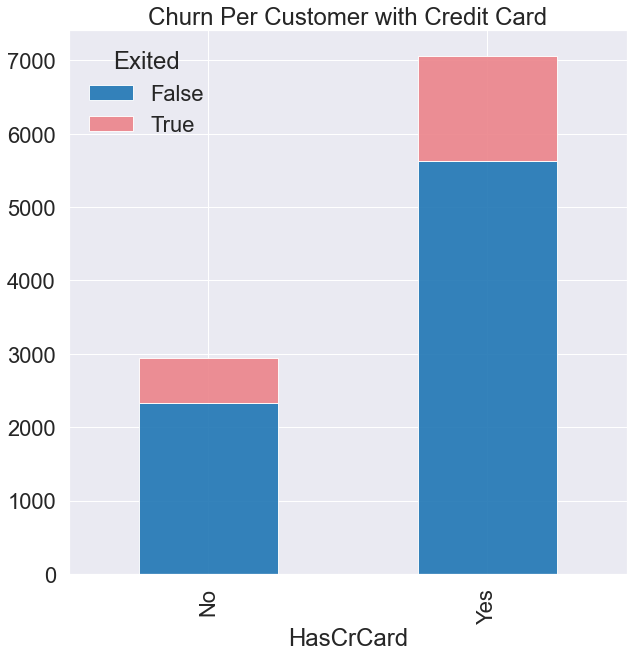

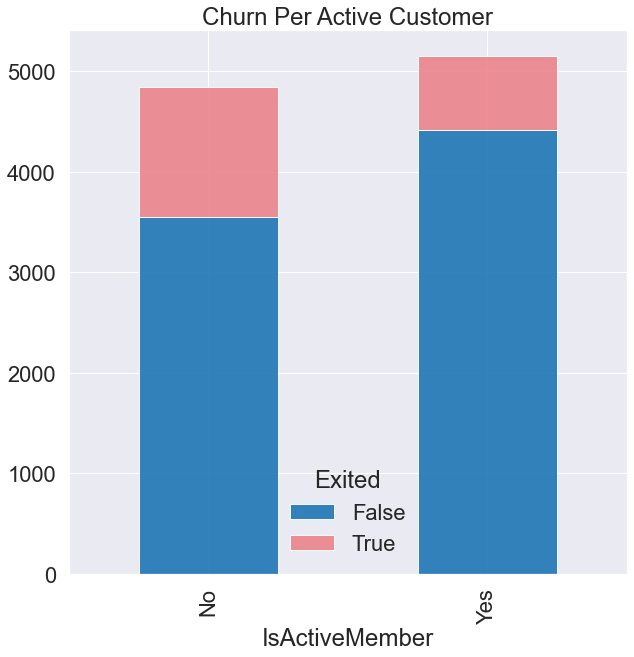

In [22]:
# plt.title('Churn Per State\n',horizontalalignment="center",fontstyle = "normal", fontsize = 24)
pal=['#1f76b4','#ec838a']
bank_customers.groupby(["Geography", "Exited"]).size().unstack().plot(kind='bar', stacked=True,
                                                         color=pal, alpha=0.9,
                                                         title = 'Churn Per Country', figsize=(10,10))
bank_customers.groupby(["Gender", "Exited"]).size().unstack().plot(kind='bar', stacked=True,
                                                            color=pal, alpha=0.9,
                                                            title = 'Churn Per Gender', figsize=(10,10))
bank_customers.groupby(["HasCrCard", "Exited"]).size().unstack().plot(kind='bar', stacked=True, 
                                                            color=pal, alpha=0.9,
                                                            title = 'Churn Per Customer with Credit Card', figsize=(10,10))
bank_customers.groupby(["IsActiveMember", "Exited"]).size().unstack().plot(kind='bar', stacked=True,
                                                             color=pal, alpha=0.9,
                                                             title = 'Churn Per Active Customer', figsize=(10,10))

In [23]:
import plotly.express as px

fig = px.scatter(bank_customers, x='Tenure', y='EstimatedSalary', 
                 color = 'Exited', template = 'presentation', 
                 opacity = 0.5, facet_col = 'Geography', 
                 title = 'Customer Churn by Tenure, Estimated Salary and Geography',
                 labels = {'x' : 'Customer Tenure', 'y' : 'Estimated Salary'})
                
fig.show(renderer="iframe")

In [24]:
fig = px.scatter(bank_customers, x='Tenure', y='EstimatedSalary', 
                 color = 'Exited', template = 'presentation', 
                 opacity = 0.5, facet_col = 'Gender', 
                 title = 'Customer Churn by Tenure, Estimated Salary and Gender',
                 labels = {'x' : 'Customer Tenure', 'y' : 'Estimated Salary'})
                
fig.show(renderer="iframe")

In [25]:
fig = px.scatter(bank_customers, x='Tenure', y='EstimatedSalary', 
                 color = 'Exited', template = 'presentation', 
                 opacity = 0.5, facet_col = 'IsActiveMember', 
                 title = 'Customer Churn by Tenure, Estimated Salary, and Active Customer',
                 labels = {'x' : 'Customer Tenure', 'y' : 'Estimated Salary'})
                
fig.show(renderer="iframe")

In [26]:
fig = px.scatter(bank_customers, x='Tenure', y='EstimatedSalary', 
                 color = 'Exited', template = 'presentation', 
                 opacity = 0.5, facet_col = 'HasCrCard', 
                 title = 'Customer Churn by Tenure, Estimated Salary, and Customer with Credit Card',
                 labels = {'x' : 'Customer Tenure', 'y' : 'Estimated Salary'})
                
fig.show(renderer="iframe")

In [27]:
fig = px.scatter(bank_customers, x='Tenure', y='EstimatedSalary', 
                 color = 'Exited', template = 'presentation', 
                 opacity = 0.5, facet_col = 'NumOfProducts', 
                 title = 'Customer Churn by Tenure, Estimated Salary, and Number Of Products',
                 labels = {'x' : 'Customer Tenure', 'y' : 'Estimated Salary'})
                
fig.show(renderer="iframe")

In [28]:
num_columns = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
calc_vif(bank_customers[num_columns])

Checking for high multicollinearity between feature


,variables,VIF
0,CreditScore,19.44
1,Age,12.02
2,Tenure,3.85
3,Balance,2.62
4,NumOfProducts,7.66
5,EstimatedSalary,3.88


In [29]:
printtitle("### Generate training and test dataset for Churned and Non Churned:")
printtitle("####  To be split along churned and non churned customer to prevent bias/imbalance")
churned_bank_customers = bank_customers[bank_customers['Exited']==True]
nonchurned_bank_customers = bank_customers[bank_customers['Exited']==False]

X_churned_bank_customers = churned_bank_customers.drop(columns = ['Exited'], axis=1)
Y_churned_bank_customers = churned_bank_customers.filter(['Exited'])
X_nonchurned_bank_customers = nonchurned_bank_customers.drop(columns = ['Exited'], axis=1)
Y_nonchurned_bank_customers = nonchurned_bank_customers.filter(['Exited'])

printtitle("##### Divide the churned dataset to training and test sets.")
X_train_churned_bank_customers, X_test_churned_bank_customers, Y_train_churned_bank_customers, Y_test_churned_bank_customers = train_test_split(
    X_churned_bank_customers, Y_churned_bank_customers, test_size=.20, random_state=4, shuffle =True)


print('Train Churned Customer Dataset - Feature: (%d , %d)' % (X_train_churned_bank_customers.shape))
print('Train Churned Customer Dataset - Target: (%d , %d)' % (Y_train_churned_bank_customers.shape))
print('Test Churned Customer Dataset - Feature: (%d , %d)' % (X_test_churned_bank_customers.shape))
print('Test Churned Customer Dataset - Target: (%d , %d)' % (Y_test_churned_bank_customers.shape))

printtitle("##### Divide the non-churned dataset to training and test sets.")
X_train_nonchurned_bank_customers, X_test_nonchurned_bank_customers, Y_train_nonchurned_bank_customers, Y_test_nonchurned_bank_customers = train_test_split(
    X_nonchurned_bank_customers, Y_nonchurned_bank_customers, test_size=.20, random_state=4, shuffle =True)


print('Train Non Churned Customer Dataset - Feature: (%d , %d)' % (X_train_nonchurned_bank_customers.shape))
print('Train Non Churned Customer Dataset - Target: (%d , %d)' % (Y_train_nonchurned_bank_customers.shape))
print('Test Non Churned Customer Dataset - Feature: (%d , %d)' % (X_test_nonchurned_bank_customers.shape))
print('Test Non Churned Customer Dataset - Target: (%d , %d)' % (Y_test_nonchurned_bank_customers.shape))



### Generate training and test dataset for Churned and Non Churned:

####  To be split along churned and non churned customer to prevent bias/imbalance

##### Divide the churned dataset to training and test sets.

Train Churned Customer Dataset - Feature: (1629 , 10)
Train Churned Customer Dataset - Target: (1629 , 1)
Test Churned Customer Dataset - Feature: (408 , 10)
Test Churned Customer Dataset - Target: (408 , 1)


##### Divide the non-churned dataset to training and test sets.

Train Non Churned Customer Dataset - Feature: (6370 , 10)
Train Non Churned Customer Dataset - Target: (6370 , 1)
Test Non Churned Customer Dataset - Feature: (1593 , 10)
Test Non Churned Customer Dataset - Target: (1593 , 1)


In [30]:
bank_customers.loc[890,]

CreditScore             788
Geography             Spain
Gender                 Male
Age                      37
Tenure                    8
Balance           141541.25
NumOfProducts             1
HasCrCard                No
IsActiveMember           No
EstimatedSalary    66013.27
Exited                False
Name: 890, dtype: object

In [31]:
printtitle("### Combine generated training and test dataset for Churned and Non Churned:")

printtitle("####  Merge Training Data set for churned and non churned")

X_train_bank_customers = pd.concat([X_train_churned_bank_customers,X_train_nonchurned_bank_customers], axis=0)
Y_train_bank_customers = pd.concat([Y_train_churned_bank_customers,Y_train_nonchurned_bank_customers], axis=0)

train_bank_customers = pd.concat([X_train_bank_customers,Y_train_bank_customers], axis = 1)

train_bank_customers.head()

### Combine generated training and test dataset for Churned and Non Churned:

####  Merge Training Data set for churned and non churned

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9556,769,Germany,Male,34,7,115101.50,1,No,No,57841.89,True
867,636,France,Female,48,1,170833.46,1,Yes,No,110510.28,True
8171,496,Spain,Female,44,0,179356.28,2,Yes,No,2919.21,True
5632,644,France,Male,44,5,73348.56,1,Yes,No,157166.79,True
4166,850,Spain,Female,45,5,174088.30,4,Yes,No,5669.31,True


In [32]:
printtitle("####  Merge Test Data set for churned and non churned")

X_test_bank_customers = pd.concat([X_test_churned_bank_customers,X_test_nonchurned_bank_customers], axis=0)
Y_test_bank_customers = pd.concat([Y_test_churned_bank_customers,Y_test_nonchurned_bank_customers], axis=0)

test_bank_customers = pd.concat([X_test_bank_customers,Y_test_bank_customers], axis = 1)
test_bank_customers.head()

####  Merge Test Data set for churned and non churned

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
921,609,Spain,Male,61,1,0.00,1,Yes,No,22447.85,True
8784,638,Germany,Female,41,9,144326.09,1,Yes,No,73979.85,True
4712,474,France,Male,54,3,0.00,1,Yes,No,108409.17,True
6354,660,Spain,Female,42,5,0.00,3,Yes,Yes,189016.24,True
1701,792,France,Male,50,9,0.00,4,Yes,Yes,194700.81,True


In [33]:
printtitle("### Dataset Preprocessing using PyCaret")
printtitle("#### Normalize dataset to scale.")
printtitle("#### Set ['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember','Tenure'] as Categorical columns.")
printtitle("#### Fix imbalance - default is to oversample the data.")
printtitle("#### Remove multicolinerity with threshold of 0.95, Remove outliers")

### Dataset Preprocessing using PyCaret

#### Normalize dataset to scale.

#### Set ['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember','Tenure'] as Categorical columns.

#### Fix imbalance - default is to oversample the data.

#### Remove multicolinerity with threshold of 0.95, Remove outliers

In [34]:

bank_customers_setup = setup(data = train_bank_customers, test_data = test_bank_customers, 
          target = 'Exited', session_id=123, normalize = True, 
          categorical_features =['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember','Tenure'],
          remove_multicollinearity = True, multicollinearity_threshold = 0.95, remove_outliers = True,
          remove_perfect_collinearity = True, fix_imbalance = True, silent = True)

,Description,Value
0,session_id,123
1,Target,Exited
2,Target Type,Binary
3,Label Encoded,"False: 0, True: 1"
4,Original Data,"(7999, 11)"
5,Missing Values,0
6,Numeric Features,4
7,Categorical Features,6
8,Ordinal Features,0
9,High Cardinality Features,0


In [35]:
printtitle("### Bank Churn Dataset Model Training & Selection")

### Bank Churn Dataset Model Training & Selection

In [36]:
get_config('X').head()

,CreditScore,Age,Balance,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Male,Tenure_0,Tenure_1,...,Tenure_3,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,NumOfProducts_2,HasCrCard_No,IsActiveMember_Yes
9556,1.23,-0.47,0.62,-0.75,0.00,1.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
867,-0.14,0.86,1.52,0.17,1.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8171,-1.59,0.48,1.66,-1.71,0.00,0.00,1.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
5632,-0.06,0.48,-0.05,0.99,1.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4166,2.07,0.58,1.57,-1.66,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [37]:
printtitle("#### Switching top models with n_select = 3, 5 does not make any diffrence. Default is n_select =1. Indicating our model is already optimized")

#### Switching top models with n_select = 3, 5 does not make any diffrence. Default is n_select =1. Indicating our model is already optimized

In [38]:
best_bank_customers_model = compare_models(sort = 'AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8418,0.8392,0.5623,0.5620,0.5619,0.4654,0.4656,0.5820
lightgbm,Light Gradient Boosting Machine,0.8545,0.8283,0.4887,0.6243,0.5477,0.4626,0.4678,0.2920
rf,Random Forest Classifier,0.8518,0.8226,0.4771,0.6166,0.5376,0.4511,0.4566,0.4060
ada,Ada Boost Classifier,0.8052,0.8185,0.6243,0.4715,0.5365,0.4164,0.4235,0.2230
xgboost,Extreme Gradient Boosting,0.8475,0.8141,0.4705,0.5994,0.5265,0.4373,0.4423,0.8470
lr,Logistic Regression,0.7404,0.8076,0.7320,0.3854,0.5046,0.3511,0.3845,0.9800
lda,Linear Discriminant Analysis,0.7364,0.8076,0.7342,0.3813,0.5017,0.3462,0.3807,0.0500
et,Extra Trees Classifier,0.8433,0.8057,0.4130,0.5963,0.4876,0.3988,0.4083,0.4010
nb,Naive Bayes,0.7027,0.7619,0.6811,0.3396,0.4531,0.2793,0.3112,0.0280
knn,K Neighbors Classifier,0.7176,0.7403,0.6402,0.3479,0.4506,0.2825,0.3064,0.1530


In [39]:
printtitle("#### The best model using AUC is Gradient Boosting Calssifier (GBC) with a value of 0.8584 using 10 fold cross-validation")
print(best_bank_customers_model)

#### The best model using AUC is Gradient Boosting Calssifier (GBC) with a value of 0.8584 using 10 fold cross-validation

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [40]:
printtitle("#### To understand and optimized our model architecure better, we will employ Pycaret tuning method for hyperparameter tuning")

#### To understand and optimized our model architecure better, we will employ Pycaret tuning method for hyperparameter tuning

In [41]:
tuned_best_bank_customers_model = tune_model(best_bank_customers_model)
print("There is a slight reduction in value of AUC after tuning")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8513,0.8218,0.4928,0.6126,0.5462,0.4585,0.4624
1,0.8395,0.7906,0.3986,0.5851,0.4741,0.3834,0.3933
2,0.8434,0.8046,0.4420,0.5922,0.5062,0.4155,0.4218
3,0.8513,0.8098,0.4453,0.6224,0.5191,0.4341,0.4426
4,0.8579,0.8195,0.4964,0.6355,0.5574,0.4743,0.4794
5,0.8605,0.8361,0.4964,0.6476,0.5620,0.4808,0.4868
6,0.8145,0.7552,0.3869,0.4818,0.4291,0.3200,0.3227
7,0.8618,0.8316,0.4964,0.6538,0.5643,0.4840,0.4905
8,0.8526,0.8103,0.5036,0.6106,0.5520,0.4648,0.4679
9,0.8577,0.8472,0.4818,0.6408,0.5500,0.4675,0.4742


There is a slight reduction in value of AUC after tuning


In [42]:
printtitle("### Model Analysis by plotting our model using auc")
plt.clf()

### Model Analysis by plotting our model using auc

<Figure size 720x720 with 0 Axes>

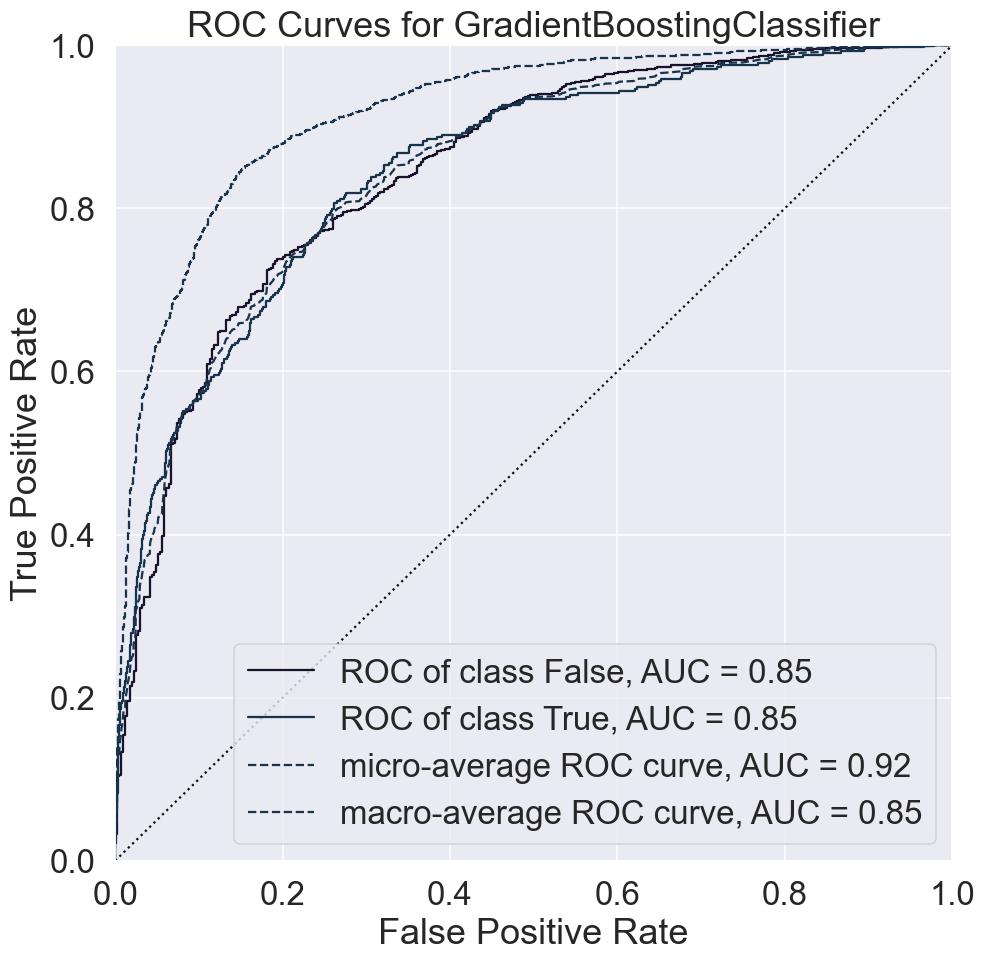

In [43]:
#plt.legend(bbox_to_anchor=(0.65, 1.25))
plt.legend(loc = 'lower right')
plot_model(tuned_best_bank_customers_model, plot = 'auc', scale = 1.5, plot_kwargs = {'percent' : True})

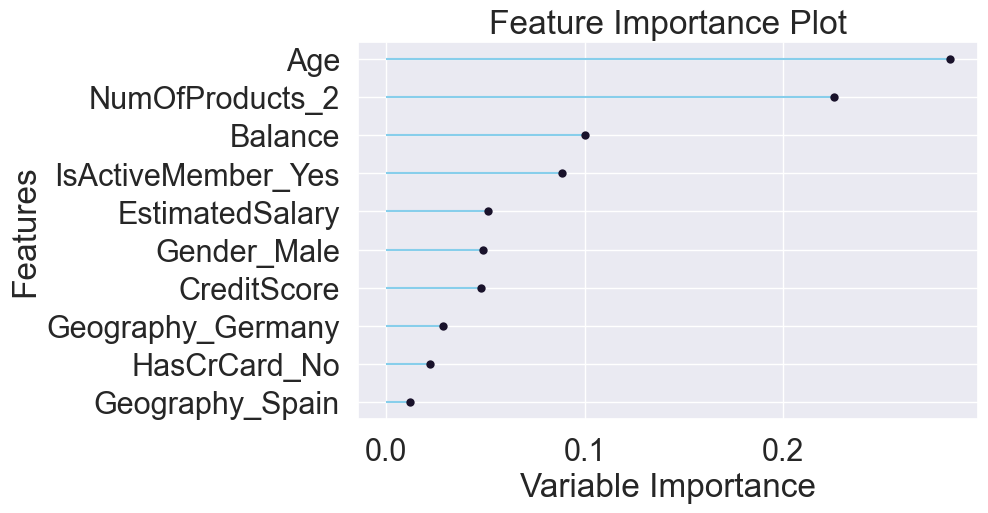

In [44]:
# Feature Importance Plot
plot_model(tuned_best_bank_customers_model, plot = 'feature')

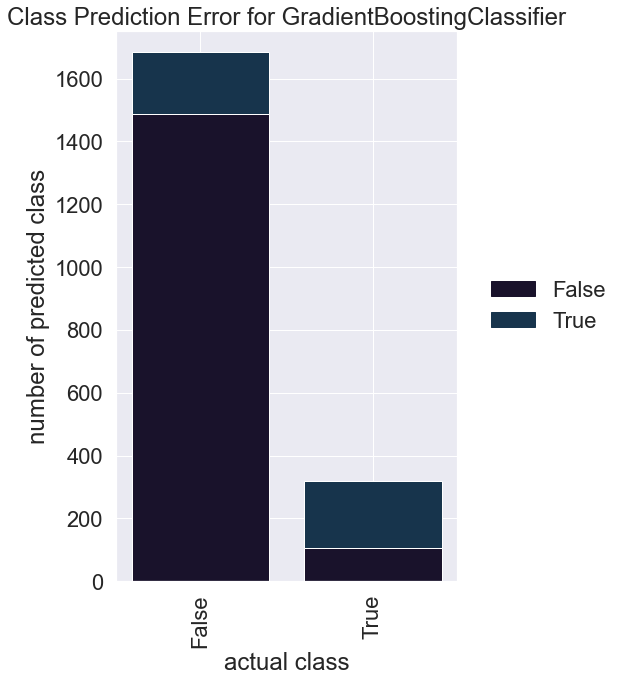

In [45]:
plot_model(tuned_best_bank_customers_model, plot='error')

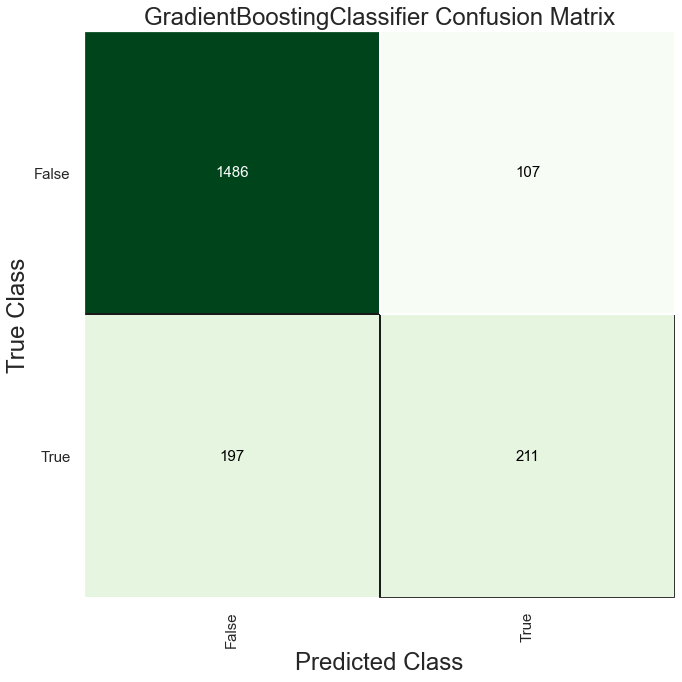

In [46]:
# Confusion Matrix
plot_model(tuned_best_bank_customers_model, plot = 'confusion_matrix')

In [47]:
printtitle("#### Hyprothetically, introducing a metric of risk-reward")
printtitle("#### We assumedly give incentive of $20000 to a member with the the target profit margin of 10000")
incentive = 2000
target_gain = 10000
table = [
    ['Type of Result', 'Bank Customers', 'Assumed Value', 'Description', 'Total Cost'], 
    ['True +', 211, target_gain, 'Target Gain', target_gain*(211)], 
    ['True + & False +',  (107+211), incentive, 'Incentives Spent', incentive * (107+211)],
    ['', '', '', 'Profit Margin', (target_gain*(211)) - (incentive * (107+211))]
]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

#### Hyprothetically, introducing a metric of risk-reward

#### We assumedly give incentive of $20000 to a member with the the target profit margin of 10000

╒══════════════════╤══════════════════╤═════════════════╤══════════════════╤══════════════╕
│ Type of Result   │ Bank Customers   │ Assumed Value   │ Description      │   Total Cost │
╞══════════════════╪══════════════════╪═════════════════╪══════════════════╪══════════════╡
│ True +           │ 211              │ 10000           │ Target Gain      │      2110000 │
├──────────────────┼──────────────────┼─────────────────┼──────────────────┼──────────────┤
│ True + & False + │ 318              │ 2000            │ Incentives Spent │       636000 │
├──────────────────┼──────────────────┼─────────────────┼──────────────────┼──────────────┤
│                  │                  │                 │ Profit Margin    │      1474000 │
╘══════════════════╧══════════════════╧═════════════════╧══════════════════╧══════════════╛


In [48]:
# create a custom function
def compute_margin(y, y_pred):
    tp = np.where((y_pred==1) & (y==1), (target_gain-incentive), 0)
    fp = np.where((y_pred==1) & (y==0), -incentive, 0)
    return np.sum([tp,fp])
# add metric to PyCaret
#remove_metric('margin')
add_metric('margin', 'Margin', compute_margin)

custom_best_bank_customers_model = compare_models(sort='Margin')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Margin,TT (Sec)
gbc,Gradient Boosting Classifier,0.8418,0.8392,0.5623,0.5620,0.5619,0.4654,0.4656,497400.0000,0.6930
ada,Ada Boost Classifier,0.8052,0.8185,0.6243,0.4715,0.5365,0.4164,0.4235,492800.0000,0.2450
lr,Logistic Regression,0.7404,0.8076,0.7320,0.3854,0.5046,0.3511,0.3845,483000.0000,0.0630
ridge,Ridge Classifier,0.7365,0.0000,0.7342,0.3815,0.5018,0.3464,0.3809,479000.0000,0.0300
lda,Linear Discriminant Analysis,0.7364,0.8076,0.7342,0.3813,0.5017,0.3462,0.3807,478800.0000,0.0520
svm,SVM - Linear Kernel,0.7265,0.0000,0.7320,0.3716,0.4921,0.3319,0.3682,462000.0000,0.0620
lightgbm,Light Gradient Boosting Machine,0.8545,0.8283,0.4887,0.6243,0.5477,0.4626,0.4678,456000.0000,0.3500
rf,Random Forest Classifier,0.8518,0.8226,0.4771,0.6166,0.5376,0.4511,0.4566,442400.0000,0.4980
xgboost,Extreme Gradient Boosting,0.8475,0.8141,0.4705,0.5994,0.5265,0.4373,0.4423,430400.0000,0.8740
nb,Naive Bayes,0.7027,0.7619,0.6811,0.3396,0.4531,0.2793,0.3112,383800.0000,0.0450


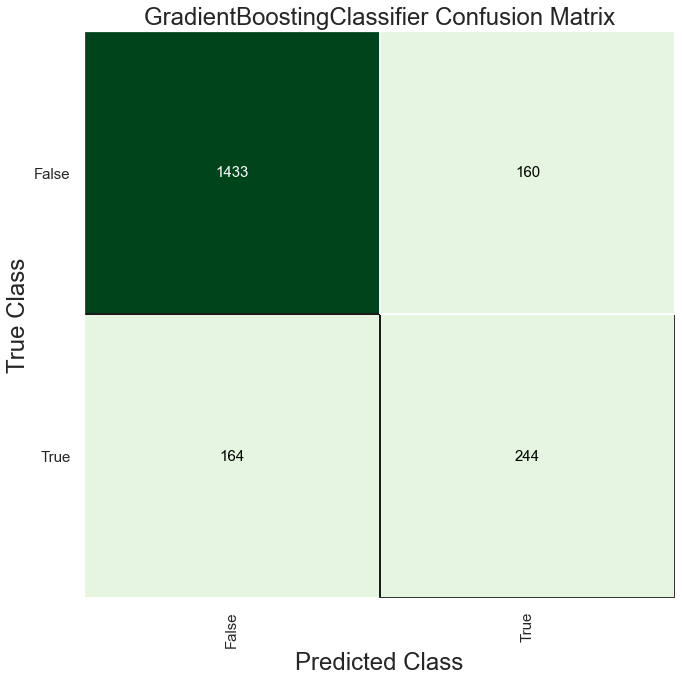

In [49]:
plot_model(custom_best_bank_customers_model, plot = 'confusion_matrix')

In [50]:
table_margin = [
    ['Type of Result', 'Bank Customers', 'Assumed Value', 'Description', 'Total Cost'], 
    ['True +', 244, target_gain, 'Target Gain', target_gain*(244)], 
    ['True + & False +',  (160+244), incentive, 'Incentives Spent', incentive * (160+244)],
    ['', '', '', 'Profit Margin', (target_gain*(244)) - (incentive * (160+265))]
]
print(tabulate(table_margin, headers='firstrow', tablefmt='fancy_grid'))

╒══════════════════╤══════════════════╤═════════════════╤══════════════════╤══════════════╕
│ Type of Result   │ Bank Customers   │ Assumed Value   │ Description      │   Total Cost │
╞══════════════════╪══════════════════╪═════════════════╪══════════════════╪══════════════╡
│ True +           │ 244              │ 10000           │ Target Gain      │      2440000 │
├──────────────────┼──────────────────┼─────────────────┼──────────────────┼──────────────┤
│ True + & False + │ 404              │ 2000            │ Incentives Spent │       808000 │
├──────────────────┼──────────────────┼─────────────────┼──────────────────┼──────────────┤
│                  │                  │                 │ Profit Margin    │      1590000 │
╘══════════════════╧══════════════════╧═════════════════╧══════════════════╧══════════════╛


In [51]:
gbc_custom_best_bank_customers_model = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Margin
0,0.8474,0.8464,0.6014,0.5764,0.5887,0.4950,0.4952,542000.0000
1,0.8145,0.8102,0.4420,0.4880,0.4639,0.3520,0.3527,360000.0000
2,0.8461,0.8374,0.5725,0.5766,0.5745,0.4806,0.4806,516000.0000
3,0.8289,0.8392,0.5401,0.5248,0.5324,0.4277,0.4278,458000.0000
4,0.8434,0.8424,0.5985,0.5616,0.5795,0.4834,0.4838,528000.0000
5,0.8500,0.8667,0.5693,0.5865,0.5778,0.4866,0.4867,514000.0000
6,0.8250,0.8107,0.5182,0.5145,0.5164,0.4095,0.4095,434000.0000
7,0.8553,0.8509,0.5839,0.6015,0.5926,0.5046,0.5047,534000.0000
8,0.8447,0.8284,0.5839,0.5674,0.5755,0.4806,0.4806,518000.0000
9,0.8630,0.8592,0.6131,0.6222,0.6176,0.5342,0.5342,570000.0000


In [52]:
save_model(gbc_custom_best_bank_customers_model, 'gbc_custom_best_bank_customers_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['Geography',
                                                             'Gender',
                                                             'NumOfProducts',
                                                             'HasCrCard',
                                                             'IsActiveMember',
                                                             'Tenure'],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Exited',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_ava...
                                             learning_rate=0.1, lo

In [54]:
printtitle("#### Test the model by making prediction using new data")
cols = ['CreditScore','Geography', 'Gender','Age','Tenure', 
        'Balance','NumOfProducts', 'HasCrCard','IsActiveMember','EstimatedSalary']
records = [
       [619, 'France', 'Female', 42, 2, 0.00, 1, 'Yes','Yes', 101348.88],
       [608, 'Spain', 'Female', 41, 1, 83807.86, 1, 'No','Yes', 112542.58],
       [502, 'France', 'Female', 42, 8, 159660.80, 3, 'Yes','No', 113931.57],
       [700, 'Spain', 'Male', 45, 0, 0.00, 2, 'Yes','No', 30000.67],
       [400, 'Germany', 'Female', 25, 3, 4567.89, 2, 'Yes','Yes', 3076800.67],
       [875, 'Germany', 'Male', 45, 5, 50000.70, 2, 'Yes','No', 567000.67],
       [850, 'Spain', 'Female', 43, 2, 125510.82, 1, 'Yes','Yes', 79084.10],
       [699, 'France', 'Female', 39, 1, 0.00, 2, 'No','No', 93826.63],
]

new_data = pd.DataFrame(data=records, columns=cols)

predict_model(gbc_custom_best_bank_customers_model, new_data)

#### Test the model by making prediction using new data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Label,Score
0,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,True,0.59
1,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,False,0.73
2,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,True,0.60
3,700,Spain,Male,45,0,0.00,2,Yes,No,30000.67,False,0.73
4,400,Germany,Female,25,3,4567.89,2,Yes,Yes,3076800.67,False,0.94
5,875,Germany,Male,45,5,50000.70,2,Yes,No,567000.67,False,0.73
6,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,False,0.76
7,699,France,Female,39,1,0.00,2,No,No,93826.63,False,0.86
